The deflection is 0 at y=0 and y=L. Also, d^2w/dy^2=0 at those points as well. So we will use sin(y*pi/L).
The deflection is 0 at x=0 and x=nL. lso, d^2w/dx^2=0 at those points as well. But d^2w/dx^2=1/p * E*t^3/(12(1-v^2))z

In [501]:
import numpy as np
import sympy as spy
import matplotlib.pyplot as plt

x, y, z, L, n = spy.symbols('x y z L n')
E, t, p, v = spy.symbols('E t p v')
c_1, c_2, c_m = spy.symbols('c_1 c_2 c_m')
m = spy.symbols('m')

x_0, x_max = 0, n*L
y_0, y_max = 0, L
# w(0)=0, and d^2w/dx^2 at 0=0
w = c_1*spy.sin(spy.pi*y/L)*spy.sin(spy.pi*x/(n*L)) + c_2*spy.sin(spy.pi*y/L)*spy.sin(2*spy.pi*x/(n*L))
w_x = spy.diff(w,x)
w_y = spy.diff(w,y)
w_x_x = spy.diff(spy.diff(w,x),x)
w_y_y = spy.diff(spy.diff(w,y),y)
w_x_y = spy.diff(spy.diff(w,x),y)

Since only $N_x$ is applied and all sides are simply supported $w=\sum_{n=1}^\infty c_n sin\frac{y\pi}{L}sin\frac{nx\pi}{L}$


We only want 2 modes so $w=c_1sin\frac{y\pi}{L}sin\frac{x\pi}{L}+c_2sin\frac{y\pi}{L}sin\frac{2x\pi}{L}$

And therefore $U_{strain}=\frac{n\pi^4}{8}\frac{Et^3}{12(1-\nu^2)}\sum_{m=1}^2 c_m^2(\frac{m}{n^2}+1)^2$

$U=\frac{\pi^4}{8n}\frac{Et^3}{12(1-\nu^2)}(c_1^2(1+n^2)+c_2(2+n^2))$

Since $n=1,2$ $U_{strain}=\frac{\pi^4}{8L^2}\frac{Et^3}{12(1-\nu^2)} (4c_1^2 + 25c_2^2)$

For $U_{spring}=\frac{1}{2}k\int_0^L w^2dx$

In [502]:
U_strain = spy.pi**4*E*t**3/(8*L**2*12*(1-v**2)) * (4*c_1**2+25*c_2**2)

In [503]:
k = 1/p * (E*t**3)/(12*(1-v**2))
U_spring = 1/2 * k * (spy.integrate(w**2, (x, 0, L)))
U_spring = U_spring.subs(spy.sin(spy.pi*n), 0)
U_spring = U_spring.subs(spy.cos(spy.pi*n), 1)
U_spring.simplify()

0.00347222222222222*E*L*t**3*(3*c_1**2*n*sin(2*pi/n) - 6*pi*c_1**2 - 12*c_1*c_2*n*sin(pi/n) + 4*c_1*c_2*n*sin(3*pi/n) + 3*c_2**2*n*sin(4*pi/n)/2 - 6*pi*c_2**2)*sin(pi*y/L)**2/(pi*p*(v**2 - 1))

$U_{spring}=\frac{ELt^3sin\frac{n\pi}{L}\sum_{m=1}^2c_m^2}{48p(\nu^2-1)}$

But the total number of springs depends on n. So \
$U_{spring}=\frac{(n-1)ELt^3sin\frac{n\pi}{L}\sum_{m=1}^2c_m^2}{48p(\nu^2-1)}$

So total $U=\frac{n\pi^4}{8}\frac{Et^3}{12(1-\nu^2)}\sum_{m=1}^2 c_m^2(\frac{m}{n^2}+1)^2+\frac{(n-1)ELt^3sin\frac{n\pi}{L}\sum_{m=1}^2c_m^2}{48p(\nu^2-1)}$

In [504]:
W = 1/2 * spy.integrate(spy.integrate(N_x * w_x**2, (x, 0, L)), (y, 0, n*L))
W = W.subs(spy.sin(spy.pi*n), 0)
W = W.subs(spy.cos(spy.pi*n), 1)
W.simplify()

0.0416666666666667*pi*N_x*(3*c_1**2*n*sin(2*pi/n)/2 + 3*pi*c_1**2 + 12*c_1*c_2*n*sin(pi/n) + 4*c_1*c_2*n*sin(3*pi/n) + 3*c_2**2*n*sin(4*pi/n) + 12*pi*c_2**2)/n

$W=\frac{n\pi^2N_x}{8}\sum_{m=1}^2(c_m^2m^2)$

$=\frac{n\pi^2N_x}{8}(c_1^2 +4c_2^2)$

$\Pi=\frac{n\pi^4}{8}\frac{Et^3}{12(1-\nu^2)}\sum_{m=1}^2 c_m^2(\frac{m}{n^2}+1)^2+\frac{(n-1)ELt^3sin\frac{n\pi}{L}\sum_{m=1}^2c_m^2}{48p(\nu^2-1)}-\frac{n\pi^2N_x}{8}\sum_{m=1}^2(c_m^2m^2)$

$\frac{\partial \Pi}{\partial c_m}=\frac{n\pi^4}{4}\frac{Et^3}{12(1-\nu^2)}\sum_{m=1}^2c_m(\frac{m}{n^2}+1)^2+\frac{(n-1)ELt^3}{24(\nu^2-1)}sin\frac{n\pi}{L}\sum_{m=1}^2c_m-\frac{n\pi^2N_x}{4}\sum_{m=1}^2c_mm^2$

N_x = 

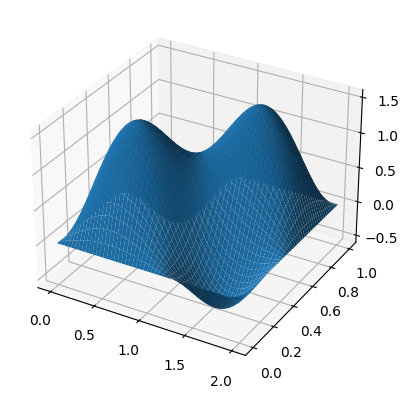

In [506]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

L = 1
n = 2
# Example with all Cs equal to 1
def f(x, y):
    return np.sin(np.pi*y/L)*np.sin(np.pi*x/(n*L)) + np.sin(2*np.pi*y/L)*np.sin(2*np.pi*x/(n*L))

# Generate the x and y values
x = np.linspace(0, n*L, 100*n)
y = np.linspace(0, L, 100)
X, Y = np.meshgrid(x, y)

# Calculate the corresponding z values
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

ax.set_label('x')
ax.set_label('y')
# Show the plot
plt.show()

In [507]:
L, n = spy.symbols('L n')
E, t = spy.symbols('E t')
c_m = spy.symbols('c_m')
a, b = spy.symbols('a b')
v, m = spy.symbols('v m')
x, y = spy.symbols('x y')
a = n*L
b = L
k = 1/p * (E*t**3)/(12*(1-v**2))

w = c_m * spy.sin(spy.pi*y/b) * spy.sin(m*spy.pi*x/a)
w


c_m*sin(pi*y/L)*sin(pi*m*x/(L*n))

In [508]:
U_strain = a*b*spy.pi**4/8 * E*t**3/(12*(1-v**2)) * c_m**2 * (m**2/(a**2) + 1**2/(b**2))**2
U_spring = 1/2 *spy.integrate(k*w**2, (y, 0, L))
U_spring = U_spring.subs(spy.sin(spy.pi*m), 0)
W = b*spy.pi**2/(8*a) * N_x * c_m**2 * m**2
display(U_spring)
display(U_strain)
display(W)

0.5*Piecewise((E*L*c_m**2*t**3*sin(pi*m*x/(L*n))**2/(2*p*(12 - 12*v**2)), (L > -oo) & (L < oo) & Ne(L, 0)), (0, True))

pi**4*E*L**2*c_m**2*n*t**3*(m**2/(L**2*n**2) + L**(-2))**2/(8*(12 - 12*v**2))

pi**2*N_x*c_m**2*m**2/(8*n)

In [509]:

PI = U_strain + U_spring - W
PI_c = spy.diff(PI, c_m)
numerator = PI_c.as_numer_denom()[0]
numerator = numerator/(L**6*c_m*n**2)
numerator = numerator.simplify()
numerator = numerator.subs(x, n-1)
numerator

Piecewise(((2.0*E*L**3*n**3*t**3*sin(pi*m*(n - 1)/(L*n))**2 + pi**2*p*(pi**2*E*t**3*(m**2 + n**2)**2 + 12*L**2*N_x*m**2*n**2*(v**2 - 1)))/p, ((L > -oo) | (L > 0)) & ((L > -oo) | (L < oo)) & ((L > 0) | (L < 0)) & ((L < 0) | (L < oo))), (pi**2*(pi**2*E*t**3*(m**2 + n**2)**2 + 12*L**2*N_x*m**2*n**2*(v**2 - 1)), True))

$-2EL^3n^3t^3(n-1)sin^2(\frac{\pi mx}{Ln})-\pi^2p(\pi^2Et^3(m^2+n^2)^2+12L^2N_xm^2n^2(\nu^2-1))$